## Spam Email Classifier with KNN using TF-IDF scores

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
5.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
6.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

**Task: Given an email, classify it as spam or ham**

Given input text file ("emails.txt") containing 5572 email messages, with each row having its corresponding label (spam/ham) attached to it.

This task also requires basic pre-processing of text (like removing stopwords, stemming/lemmatizing, replacing email_address with 'email-tag', etc..).

You are required to find the tf-idf scores for the given data and use them to perform KNN using Cosine Similarity.

### Import necessary libraries

In [94]:
!pip install nltk
import nltk
import re
import numpy as np
import pandas as pd
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load dataset

In [95]:
with open ("emails.txt", "r") as myfile:
    data=myfile.readlines()

### Preprocess data

In [96]:
"""get all stop words"""
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
# print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
mails=[]
spam_ham=[]
for mail in data:
    new_string = mail.translate(str.maketrans('', '', string.punctuation))
    # print("Punctuations removed: ", new_string)
    lower_str= new_string.lower()
    # print("Lower : ",lower_str)
    tokenized_word=word_tokenize(lower_str)
    # print(tokenized_word) 
    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)

    spam_ham.append(filtered_sent[0])
    filtered_sent.pop(0)
    # print("Filterd Sentence:",filtered_sent)
    lem_str=[]
    for word in filtered_sent:
        lem_str.append(lem.lemmatize(word))
    # print("Lemmatized words: ", lem_str)
    mails.append(lem_str)

In [99]:
tf=[]
idf={}
vocab=[]
for text in mails:
    count=0
    word_freq={}
    for word in text:
        if word in word_freq:
            word_freq[word]+=1
        else:
            word_freq[word]=1
        count+=1
        if word not in idf:
            idf[word]=0
            vocab.append(word)

    for k,v in word_freq.items():
        word_freq[k]=v/count
    tf.append(word_freq)

In [100]:
docs=0
for text in tf:
    for k,v in text.items():
        idf[k]+=1
    docs+=1

In [101]:
for k,v in idf.items():
    idf[k]=np.log2(docs/v)
# print(idf)

In [102]:
tf_idf=[]
for text in tf:
    temp={}
    for k,v in text.items():
        temp[k]=v*idf[k]
    tf_idf.append(temp)
# print(tf_idf)

In [103]:
tf_idf_vector=[]
for text in tf_idf:
    vector=[]
    for word in vocab:
        if word in text:
            vector.append(text[word])
        else:
            vector.append(0)
    tf_idf_vector.append(np.array(vector))

In [104]:
data={'Label':spam_ham, 'tf_idf_value': tf_idf_vector}
df = pd.DataFrame(data)
print(df)

     Label                                       tf_idf_value
0      ham  [0.2674743975267576, 0.7777810804439881, 0.462...
1      ham  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2     spam  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      ham  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      ham  [0.5349487950535152, 0.0, 0.0, 0.0, 0.0, 0.0, ...
...    ...                                                ...
5569  spam  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5570   ham  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5571   ham  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5572   ham  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5573   ham  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[5574 rows x 2 columns]


### Split data

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
train, test = train_test_split(df, test_size=0.2, random_state=0, stratify=spam_ham)
# print(train)
# print(test)

In [107]:
actual=[]
for idx in range(len(test)):
    actual.append(test['Label'][test.index[idx]])

### Train your KNN model (reuse previously iplemented model built from scratch) and test on your data

***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [108]:
def cosine_similarity(List1,List2):
    result = dot(List1, List2)/(norm(List1)*norm(List2))
    return result

def manhattan_distance(List1, List2):
    return np.abs(List1-List2).sum()

def eucledian_distance(List1,List2):
    sq = np.sum(np.square(List1 - List2))
    return (np.sqrt(sq))

In [109]:
from numpy import dot
from numpy.linalg import norm
similarity=[]
man_dist = []
euc_dist = []
# count=0
a=np.array(test['tf_idf_value'])
b=np.array(train['tf_idf_value'])
for x in range(len(test)):
    temp={}
    man_temp = {}
    euc_temp = {}
    for y in range(len(train)):
        result1 = manhattan_distance(a[x],b[y])
        result2 = cosine_similarity (a[x],b[y])
        result3 = eucledian_distance(a[x],b[y])
        temp[y] = result2
        man_temp[y] = result1
        euc_temp[y] = result3
    similarity.append(dict(sorted(temp.items(), key=lambda x: x[1], reverse=True)))
    man_dist.append(dict(sorted(man_temp.items(), key=lambda x: x[1])))
    euc_dist.append(dict(sorted(euc_temp.items(), key=lambda x: x[1])))
    # count+=1
    # print(count)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [110]:
# cosine_similarity
knn_val=[1,3,5,7,11,17,23,28]
res=[]
for val in knn_val:
    prediction=[]
    for data in similarity:
        knn=val
        spam=0
        ham=0
        for k,v in data.items():
            if df['Label'][train.index[k]] == 'spam':
                spam+=1
            else:
                ham+=1
            knn-=1
            if(knn==0):
                break
        if spam>ham:
            prediction.append('spam')
        else:
            prediction.append('ham')
    res.append(prediction)


In [111]:
# manhattan_distance
knn_val=[1,3,5,7,11,17,23,28]
man_res=[]
for val in knn_val:
    prediction=[]
    for data in man_dist:
        knn=val
        spam=0
        ham=0
        for k,v in data.items():
            if df['Label'][train.index[k]] == 'spam':
                spam+=1
            else:
                ham+=1
            knn-=1
            if(knn==0):
                break
        if spam>ham:
            prediction.append('spam')
        else:
            prediction.append('ham')
    man_res.append(prediction)


In [112]:
# eucledian_distance
knn_val=[1,3,5,7,11,17,23,28]
euc_res=[]
for val in knn_val:
    prediction=[]
    for data in euc_dist:
        knn=val
        spam=0
        ham=0
        for k,v in data.items():
            if df['Label'][train.index[k]] == 'spam':
                spam+=1
            else:
                ham+=1
            knn-=1
            if(knn==0):
                break
        if spam>ham:
            prediction.append('spam')
        else:
            prediction.append('ham')
    euc_res.append(prediction)


In [113]:
# cosine_similarity
from sklearn import metrics
print("Cosine Metric")
for prediction in res:
    print(metrics.confusion_matrix(actual, prediction, labels=["ham", "spam"]))
    print(metrics.classification_report(actual, prediction, labels=["ham", "spam"],zero_division=1))

# manhattan_distance
print("Manhattan Distance")
for prediction in man_res:
    print(metrics.confusion_matrix(actual, prediction, labels=["ham", "spam"]))
    print(metrics.classification_report(actual, prediction, labels=["ham", "spam"],zero_division=1))

# eucledian_distance
print("Eucledian Distance")
for prediction in euc_res:
    print(metrics.confusion_matrix(actual, prediction, labels=["ham", "spam"]))
    print(metrics.classification_report(actual, prediction, labels=["ham", "spam"],zero_division=1))

Cosine Metric
[[961   5]
 [ 39 110]]
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98       966
        spam       0.96      0.74      0.83       149

    accuracy                           0.96      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

[[965   1]
 [ 53  96]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       0.99      0.64      0.78       149

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115

[[966   0]
 [ 54  95]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.64      0.78       149

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88  

In [114]:
# cosine_similarity
cos_score=[]
cos_accuracy=[]
for predict in res:
    cos_score.append(metrics.f1_score(actual, predict, average=None)[1])
    cos_accuracy.append(metrics.accuracy_score(actual, predict))
# print(cos_score)

# manhattan_distance
man_score=[]
man_accuracy=[]
for predict in man_res:
    man_score.append(metrics.f1_score(actual, predict, average=None)[1])
    man_accuracy.append(metrics.accuracy_score(actual, predict))
# print(man_score)

# eucledian_distance
euc_score=[]
euc_accuracy=[]
for predict in euc_res:
    euc_score.append(metrics.f1_score(actual, predict, average=None)[1])
    euc_accuracy.append(metrics.accuracy_score(actual, predict))
# print(euc_score)

***2. Explain which distance measure works best and why? Explore the distance measures and weigh their pro and cons in different application settings.***

Euclidean Distance is the shortest distance between any two points in the space. It is not preferred when there is high dimensionality in the data due to the squared terms, this makes it particularly sensitive to noise. It is generally used to find the distance between two real-valued vectors like integer, float, etc.

Manhattan Distance is the sum of absolute differences between the two points across all dimensions. Hence, as the dimension of the data increases, it is preferred over euclidean distance due to the ‘curse of dimensionality.’

The cosine distance metric is mainly used to find the amount of similarity between two data points. It is faster as it does not compute a square root, which is present in the euclidean distance, thus the computer need not do many operations. It was observed that TF-IDF works well with the document-term matrix and gives better accuracy than the other distance metrics.

***3. Why accuracy alone is not sufficient to evaluate the model? Why we need precision/recall/f1-score?***


Accuracy is the proportion of correct results that a classifier achieved. Accuracy alone is not sufficient as it doesn't work properly on unbalanced data.Accuracy can also be written as (TP + TN)/(TP + TN + FP + FN) where - 

**True Positives (TP):** number of positive examples labeled as positive.
**False Positives (FP):** number of negative examples, labeled as positive.
**True Negatives (TN):** number of negative examples, labeled as negative.
**False Negatives (FN):** number of positive examples, labeled as negative.

There is something known as accuracy paradox that occurs when FP>TP and thus the accuract does not give best results. Here we use Precision, Recall, F-score for better comparison.

**Precision** : It tells that out of all the samples labelled as positive by the classfier are correct.

**Recall** : It tells that how many of the positive samples did the classifier correctly classify.

**F1-Score**: It combines precision and recall into a single value.

In [115]:
acc_data={'k_value':knn_val, 'Cosine_accuracy': cos_accuracy , 'Manhattan_accuracy': man_accuracy, 'Euclidean_accuracy':euc_accuracy}
acc_df = pd.DataFrame(acc_data)
print(acc_df)

   k_value  Cosine_accuracy  Manhattan_accuracy  Euclidean_accuracy
0        1         0.960538            0.938117            0.934529
1        3         0.951570            0.913004            0.911211
2        5         0.951570            0.898655            0.896861
3        7         0.943498            0.892377            0.887892
4       11         0.942601            0.895067            0.894170
5       17         0.939013            0.889686            0.895964
6       23         0.934529            0.881614            0.884305
7       28         0.930045            0.878924            0.875336


Thus, we can see in the table above, Cosine Similarity gives a better accuracy than manhattan and eucledian distance for any given value of k. 

***4. Choose different K values (k=1,3,5,7,11,17,23,28) and experiment. Plot a graph showing R2 score vs k.***

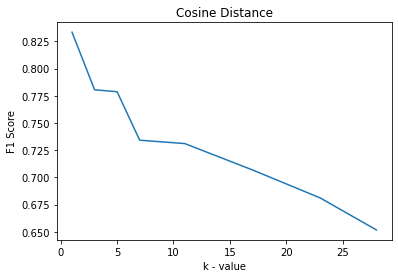

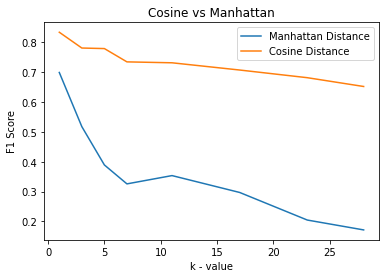

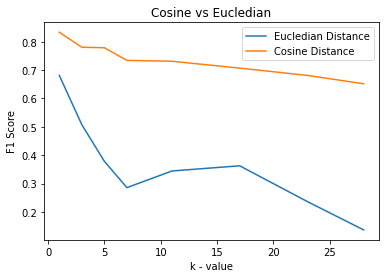

In [116]:
# cosine_similarity
import matplotlib.pyplot as plt
plt.plot(knn_val, cos_score)
plt.xlabel('k - value')
plt.ylabel('F1 Score')
plt.title('Cosine Distance')
plt.show()

# manhattan_distance
plt.plot(knn_val, man_score, Label="Manhattan Distance")
plt.plot(knn_val, cos_score, Label="Cosine Distance")
plt.xlabel('k - value')
plt.ylabel('F1 Score')
plt.title('Cosine vs Manhattan')
plt.legend()
plt.show()

# eucledian_distance
plt.plot(knn_val, euc_score, Label="Eucledian Distance")
plt.plot(knn_val, cos_score, Label="Cosine Distance")
plt.xlabel('k - value')
plt.ylabel('F1 Score')
plt.title('Cosine vs Eucledian')
plt.legend()
plt.show()

### Train and test Sklearn's KNN classifier model on your data (use metric which gave best results on your experimentation with built-from-scratch model.)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn_val=[1,3,5,7,11,17,23,28]
score=[]
for val in knn_val:
    knn = KNeighborsClassifier(n_neighbors=val, metric='cosine')
    clf = knn.fit(list(train['tf_idf_value']), list(train['Label']))
    predicted = clf.predict(list(test['tf_idf_value']))
    score.append(metrics.f1_score(actual, list(predicted), average=None)[1])
# print(score)

In [ ]:
plt.plot(knn_val, score)
plt.xlabel('k - value')
plt.ylabel('F1 Score')
plt.title('Sklearn KNN Cosine Distance')
plt.show()

***Compare both the models result.***

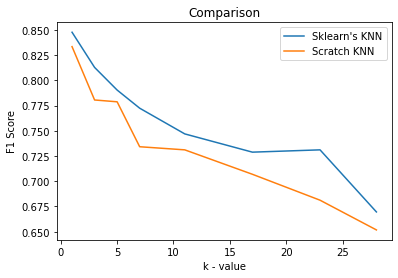

In [119]:
plt.plot(knn_val, score, Label="Sklearn's KNN")
plt.plot(knn_val, cos_score, Label="Scratch KNN")
plt.xlabel('k - value')
plt.ylabel('F1 Score')
plt.title('Comparison')
plt.legend()
plt.show()

***What is the time complexity of training using KNN classifier?***

The time complexity of training using the KNN classifier is O(1) which means that it is constant.

***What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?***

The time complexity of testing using the KNN classifier is O(n) which means it depends on the number of test samples.

KNN is a non-linear classifier. The decision boundaries of KNN look locally linear segments, but they have a complex shape that is not equivalent to a line in 2D. Thus, the decision boundary comes out as nonlinear and non-smooth.